# Exercice 3: Self-Attention mechanism: Compute word embeddings



1) Use a different sentence to compute word embeddings. Tokenize the sentence and create embeddings using a different method (e.g., Word2Vec or GloVe). Compute the query, key, and value matrices for these new embeddings and visualize the results.



Phrase: artificial intelligence is transforming our world rapidly
Nombre de mots: 7

Embedding dimension: 10
Input shape: (7, 10)

Embeddings créés (type Word2Vec/GloVe):
  artificial: mean=0.269, std=0.354
  intelligence: mean=0.223, std=0.426
  is: mean=0.269, std=0.463
  transforming: mean=0.223, std=0.429
  our: mean=0.219, std=0.369
  world: mean=0.249, std=0.367
  rapidly: mean=0.229, std=0.404


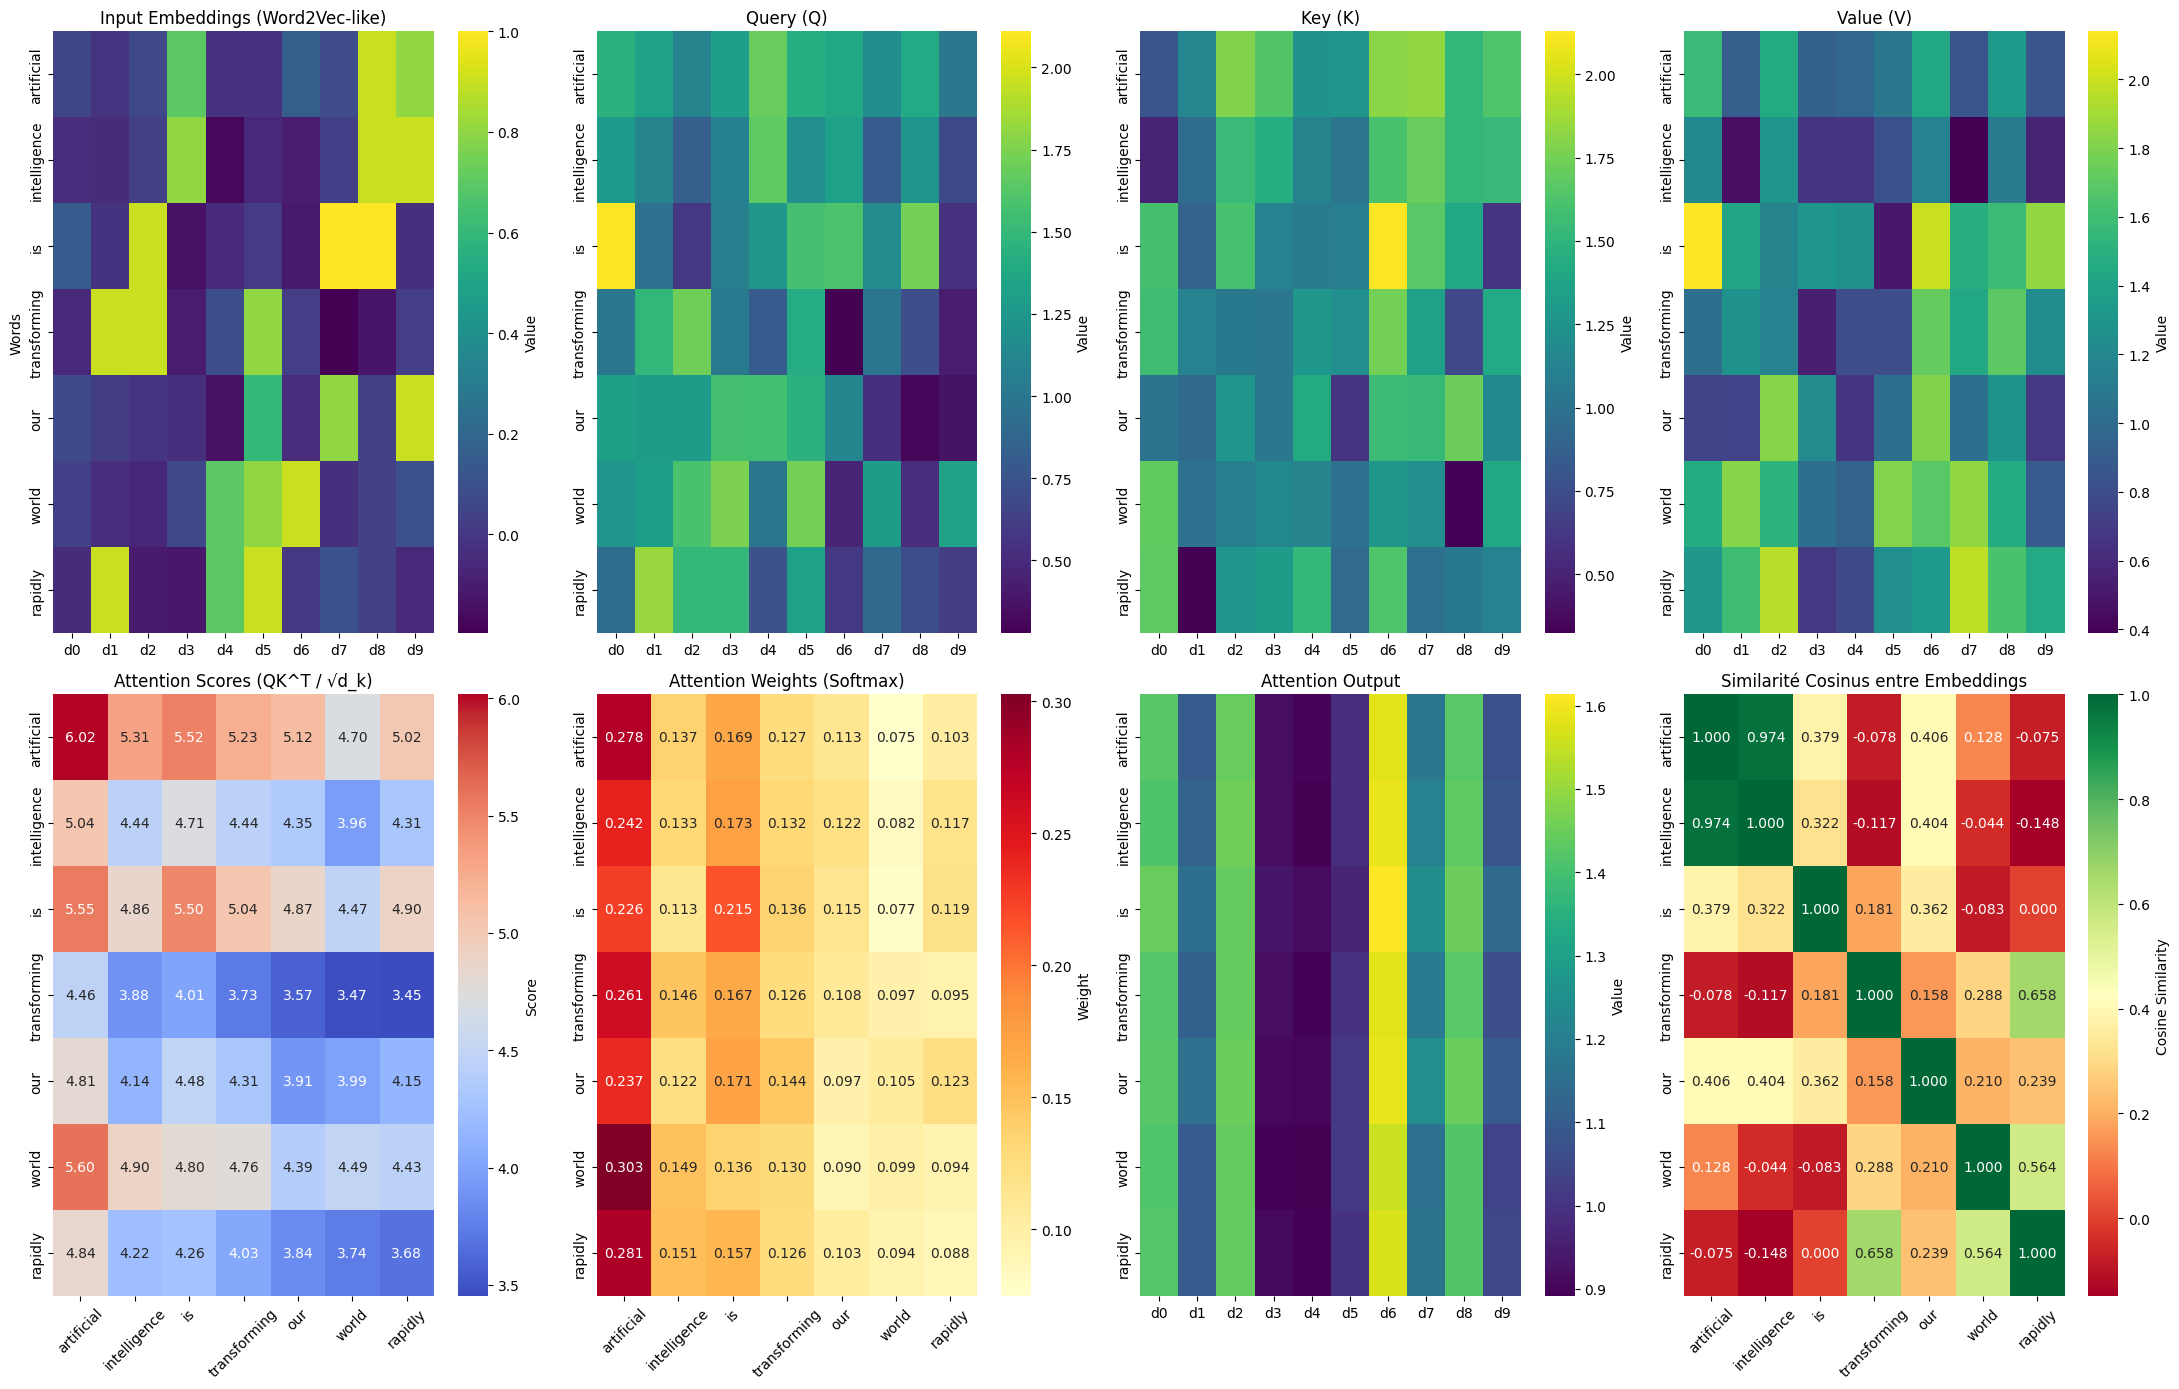


Query (Q):
 [[1.45078425 1.32213728 1.10424043 1.29765033 1.68592882 1.41419933
  1.37174676 1.16888025 1.38546857 1.0063632 ]
 [1.2762848  1.10321659 0.82641144 1.07502009 1.65709933 1.18885386
  1.30998661 0.80493976 1.24198347 0.68247227]
 [2.10977197 0.97031034 0.56954247 1.05949098 1.24720659 1.56168649
  1.59137158 1.14465937 1.72113318 0.54119033]
 [1.01260424 1.48203971 1.70288584 1.02535747 0.80340765 1.40383
  0.27942896 0.99818852 0.70850495 0.42753136]
 [1.30353354 1.28175831 1.28391799 1.56076009 1.55786757 1.45020722
  1.11108504 0.53374339 0.30734483 0.37192011]
 [1.23437366 1.28947705 1.58241358 1.74957566 1.00221076 1.72038419
  0.46242177 1.28237879 0.51135907 1.33595739]
 [0.91646173 1.83029122 1.50111476 1.49560437 0.73987834 1.3166282
  0.57939448 0.89976175 0.70184043 0.60722028]]

Key (K):
 [[0.78975905 1.1524183  1.78413314 1.63712038 1.24851771 1.26635454
  1.81534485 1.82971237 1.5119273  1.63155557]
 [0.49622409 0.95156641 1.54632868 1.44437936 1.13213449 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def create_word2vec_like_embeddings(sentence, embedding_dim=50):
   
    word_semantics = {
        'artificial': {'tech': 0.9, 'abstract': 0.7, 'modern': 0.8},
        'intelligence': {'tech': 0.9, 'abstract': 0.8, 'modern': 0.9},
        'is': {'function': 0.9, 'neutral': 1.0, 'common': 1.0},
        'transforming': {'action': 0.9, 'change': 0.9, 'dynamic': 0.8},
        'our': {'possessive': 0.9, 'common': 0.8, 'social': 0.6},
        'world': {'concrete': 0.7, 'social': 0.8, 'broad': 0.9},
        'rapidly': {'manner': 0.9, 'temporal': 0.7, 'speed': 0.9}
    }
    
    embeddings = {}
    np.random.seed(42)
    
    for word in sentence:
        embedding = np.random.randn(embedding_dim) * 0.1
        
        if word in word_semantics:
            semantics = word_semantics[word]
            for i, (feature, value) in enumerate(semantics.items()):
                idx = hash(feature) % embedding_dim
                embedding[idx] = value
        
        embeddings[word] = embedding
    
    return embeddings

sentence = ["artificial", "intelligence", "is", "transforming", "our", "world", "rapidly"]


print(f"\nPhrase: {' '.join(sentence)}")
print(f"Nombre de mots: {len(sentence)}")

embedding_dim = 10  
embeddings_dict = create_word2vec_like_embeddings(sentence, embedding_dim)

inputs = np.array([embeddings_dict[word] for word in sentence])

print(f"\nEmbedding dimension: {embedding_dim}")
print(f"Input shape: {inputs.shape}")
print("\nEmbeddings créés (type Word2Vec/GloVe):")
for word in sentence:
    print(f"  {word}: mean={np.mean(embeddings_dict[word]):.3f}, "
          f"std={np.std(embeddings_dict[word]):.3f}")

np.random.seed(42)
Wq = np.random.rand(embedding_dim, embedding_dim)
Wk = np.random.rand(embedding_dim, embedding_dim)
Wv = np.random.rand(embedding_dim, embedding_dim)

Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

attention_weights = softmax(scores)

output = np.dot(attention_weights, V)

fig = plt.figure(figsize=(22, 14))

plt.subplot(2, 4, 1)
sns.heatmap(inputs, annot=False, cmap='viridis', 
            xticklabels=[f'd{i}' for i in range(embedding_dim)], 
            yticklabels=sentence, cbar_kws={'label': 'Value'})
plt.title('Input Embeddings (Word2Vec-like)')
plt.ylabel('Words')

plt.subplot(2, 4, 2)
sns.heatmap(Q, annot=False, cmap='viridis',
            xticklabels=[f'd{i}' for i in range(embedding_dim)],
            yticklabels=sentence, cbar_kws={'label': 'Value'})
plt.title('Query (Q)')

plt.subplot(2, 4, 3)
sns.heatmap(K, annot=False, cmap='viridis',
            xticklabels=[f'd{i}' for i in range(embedding_dim)],
            yticklabels=sentence, cbar_kws={'label': 'Value'})
plt.title('Key (K)')

plt.subplot(2, 4, 4)
sns.heatmap(V, annot=False, cmap='viridis',
            xticklabels=[f'd{i}' for i in range(embedding_dim)],
            yticklabels=sentence, cbar_kws={'label': 'Value'})
plt.title('Value (V)')

plt.subplot(2, 4, 5)
sns.heatmap(scores, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=sentence, yticklabels=sentence,
            cbar_kws={'label': 'Score'})
plt.title('Attention Scores (QK^T / √d_k)')
plt.xticks(rotation=45)

plt.subplot(2, 4, 6)
sns.heatmap(attention_weights, annot=True, fmt='.3f', cmap='YlOrRd',
            xticklabels=sentence, yticklabels=sentence,
            cbar_kws={'label': 'Weight'})
plt.title('Attention Weights (Softmax)')
plt.xticks(rotation=45)

plt.subplot(2, 4, 7)
sns.heatmap(output, annot=False, cmap='viridis',
            xticklabels=[f'd{i}' for i in range(embedding_dim)],
            yticklabels=sentence, cbar_kws={'label': 'Value'})
plt.title('Attention Output')

plt.subplot(2, 4, 8)
similarity_matrix = np.zeros((len(sentence), len(sentence)))
for i in range(len(sentence)):
    for j in range(len(sentence)):
        similarity_matrix[i, j] = np.dot(inputs[i], inputs[j]) / \
                                   (np.linalg.norm(inputs[i]) * np.linalg.norm(inputs[j]))
sns.heatmap(similarity_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
            xticklabels=sentence, yticklabels=sentence,
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('Similarité Cosinus entre Embeddings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nAttention Output:\n", output)



for i, word in enumerate(sentence):
    top3_indices = np.argsort(attention_weights[i])[-3:][::-1]
    print(f"\n'{word}' prête le plus d'attention à:")
    for rank, idx in enumerate(top3_indices, 1):
        print(f"  {rank}. '{sentence[idx]}' (weight={attention_weights[i, idx]:.4f})")



similarities = []
for i in range(len(sentence)):
    for j in range(i+1, len(sentence)):
        sim = np.dot(inputs[i], inputs[j]) / \
              (np.linalg.norm(inputs[i]) * np.linalg.norm(inputs[j]))
        similarities.append((sentence[i], sentence[j], sim))

similarities.sort(key=lambda x: x[2], reverse=True)

print("\ les5 paires les plus similaires:")
for i, (w1, w2, sim) in enumerate(similarities[:5], 1):
    print(f"  {i}. '{w1}' <-> '{w2}': {sim:.4f}")




2) Change the method for initializing weights for the query, key, and value matrices. Use a different initialization technique (e.g., Xavier initialization) and compute the attention scores and attention weights. Visualize and discuss the impact of weight initialization on the self-attention mechanism.


Phrase: Transformers are powerful models for natural language processing
Nombre de mots: 8

Vocabulary size (embedding dimension): 8
Input shape: (8, 8)
  Wq - Mean: 0.4671, Std: 0.2982
  Wk - Mean: 0.4972, Std: 0.2959
  Wv - Mean: 0.4620, Std: 0.2860

Statistiques des poids (Xavier):
  Wq - Mean: -0.0403, Std: 0.3652
  Wk - Mean: -0.0034, Std: 0.3624
  Wv - Mean: -0.0465, Std: 0.3503

Statistiques des poids (He):
  Wq - Mean: -0.0957, Std: 0.4451
  Wk - Mean: 0.0301, Std: 0.4451
  Wv - Mean: 0.0198, Std: 0.4608


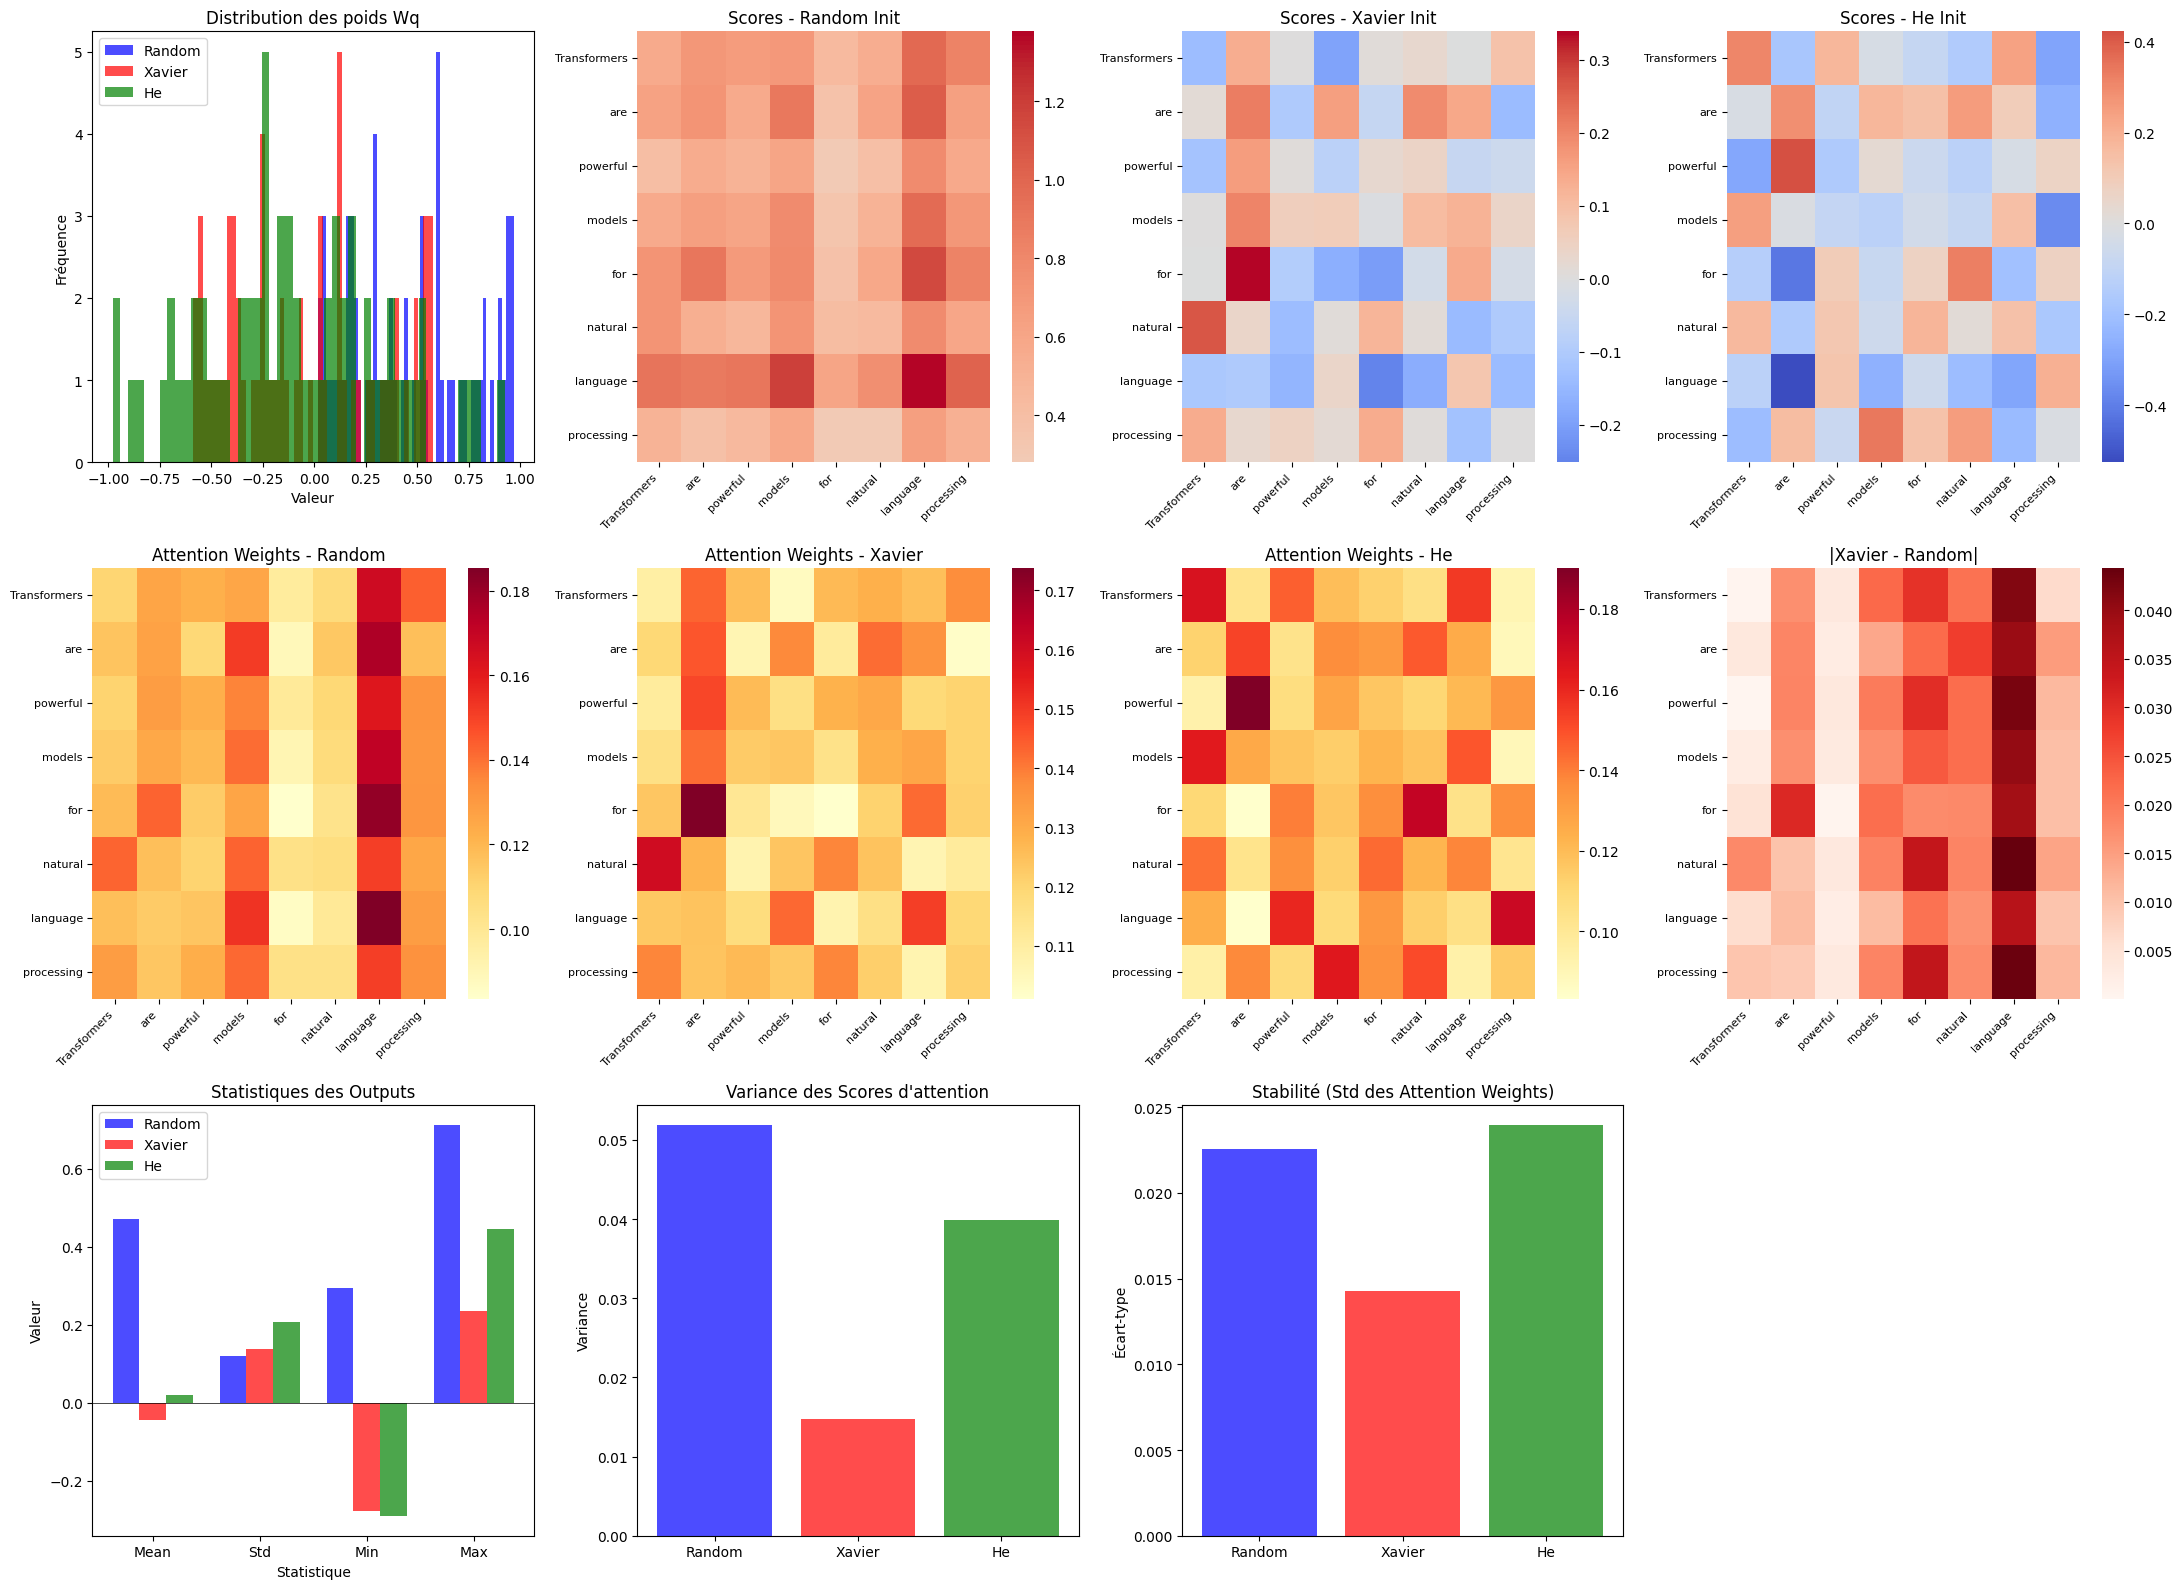


Random:
  Mean: 0.6600, Std: 0.2276
  Min: 0.2804, Max: 1.3789
  Variance: 0.0518

Xavier:
  Mean: 0.0050, Std: 0.1214
  Min: -0.2511, Max: 0.3388
  Variance: 0.0147

He:
  Mean: -0.0113, Std: 0.1998
  Min: -0.5245, Max: 0.4224
  Variance: 0.0399


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def xavier_initialization(shape):
    fan_in, fan_out = shape
    limit = np.sqrt(6.0 / (fan_in + fan_out))

    weights = np.random.uniform(-limit, limit, size=shape)
    return weights

def random_initialization(shape):
    return np.random.rand(*shape)

def he_initialization(shape):
    
    fan_in, fan_out = shape
    std = np.sqrt(2.0 / fan_in)
    weights = np.random.randn(*shape) * std
    return weights

sentence = "Transformers are powerful models for natural language processing".split()


print(f"\nPhrase: {' '.join(sentence)}")
print(f"Nombre de mots: {len(sentence)}")

#  embeddings one-hot
vocab_size = len(sentence)
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

print(f"\nVocabulary size (embedding dimension): {vocab_size}")
print(f"Input shape: {inputs.shape}")



np.random.seed(42)
Wq_random = random_initialization((vocab_size, vocab_size))
Wk_random = random_initialization((vocab_size, vocab_size))
Wv_random = random_initialization((vocab_size, vocab_size))

print(f"  Wq - Mean: {np.mean(Wq_random):.4f}, Std: {np.std(Wq_random):.4f}")
print(f"  Wk - Mean: {np.mean(Wk_random):.4f}, Std: {np.std(Wk_random):.4f}")
print(f"  Wv - Mean: {np.mean(Wv_random):.4f}, Std: {np.std(Wv_random):.4f}")

Q_random = np.dot(inputs, Wq_random)
K_random = np.dot(inputs, Wk_random)
V_random = np.dot(inputs, Wv_random)

scores_random = np.dot(Q_random, K_random.T) / np.sqrt(K_random.shape[1])
attention_weights_random = softmax(scores_random)
output_random = np.dot(attention_weights_random, V_random)



np.random.seed(42)
Wq_xavier = xavier_initialization((vocab_size, vocab_size))
Wk_xavier = xavier_initialization((vocab_size, vocab_size))
Wv_xavier = xavier_initialization((vocab_size, vocab_size))

print(f"\nStatistiques des poids (Xavier):")
print(f"  Wq - Mean: {np.mean(Wq_xavier):.4f}, Std: {np.std(Wq_xavier):.4f}")
print(f"  Wk - Mean: {np.mean(Wk_xavier):.4f}, Std: {np.std(Wk_xavier):.4f}")
print(f"  Wv - Mean: {np.mean(Wv_xavier):.4f}, Std: {np.std(Wv_xavier):.4f}")

Q_xavier = np.dot(inputs, Wq_xavier)
K_xavier = np.dot(inputs, Wk_xavier)
V_xavier = np.dot(inputs, Wv_xavier)

scores_xavier = np.dot(Q_xavier, K_xavier.T) / np.sqrt(K_xavier.shape[1])
attention_weights_xavier = softmax(scores_xavier)
output_xavier = np.dot(attention_weights_xavier, V_xavier)



np.random.seed(42)
Wq_he = he_initialization((vocab_size, vocab_size))
Wk_he = he_initialization((vocab_size, vocab_size))
Wv_he = he_initialization((vocab_size, vocab_size))

print(f"\nStatistiques des poids (He):")
print(f"  Wq - Mean: {np.mean(Wq_he):.4f}, Std: {np.std(Wq_he):.4f}")
print(f"  Wk - Mean: {np.mean(Wk_he):.4f}, Std: {np.std(Wq_he):.4f}")
print(f"  Wv - Mean: {np.mean(Wv_he):.4f}, Std: {np.std(Wv_he):.4f}")

Q_he = np.dot(inputs, Wq_he)
K_he = np.dot(inputs, Wk_he)
V_he = np.dot(inputs, Wv_he)

scores_he = np.dot(Q_he, K_he.T) / np.sqrt(K_he.shape[1])
attention_weights_he = softmax(scores_he)
output_he = np.dot(attention_weights_he, V_he)

fig = plt.figure(figsize=(22, 16))

plt.subplot(3, 4, 1)
plt.hist(Wq_random.flatten(), bins=50, alpha=0.7, label='Random', color='blue')
plt.hist(Wq_xavier.flatten(), bins=50, alpha=0.7, label='Xavier', color='red')
plt.hist(Wq_he.flatten(), bins=50, alpha=0.7, label='He', color='green')
plt.title('Distribution des poids Wq')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.legend()

plt.subplot(3, 4, 2)
sns.heatmap(scores_random, annot=False, cmap='coolwarm', center=0,
            xticklabels=sentence, yticklabels=sentence)
plt.title('Scores - Random Init')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.subplot(3, 4, 3)
sns.heatmap(scores_xavier, annot=False, cmap='coolwarm', center=0,
            xticklabels=sentence, yticklabels=sentence)
plt.title('Scores - Xavier Init')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.subplot(3, 4, 4)
sns.heatmap(scores_he, annot=False, cmap='coolwarm', center=0,
            xticklabels=sentence, yticklabels=sentence)
plt.title('Scores - He Init')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.subplot(3, 4, 5)
sns.heatmap(attention_weights_random, annot=False, cmap='YlOrRd',
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights - Random')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.subplot(3, 4, 6)
sns.heatmap(attention_weights_xavier, annot=False, cmap='YlOrRd',
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights - Xavier')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.subplot(3, 4, 7)
sns.heatmap(attention_weights_he, annot=False, cmap='YlOrRd',
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights - He')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.subplot(3, 4, 8)
diff = np.abs(attention_weights_xavier - attention_weights_random)
sns.heatmap(diff, annot=False, cmap='Reds',
            xticklabels=sentence, yticklabels=sentence)
plt.title('|Xavier - Random|')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.subplot(3, 4, 9)
stats_data = {
    'Random': [np.mean(output_random), np.std(output_random), 
               np.min(output_random), np.max(output_random)],
    'Xavier': [np.mean(output_xavier), np.std(output_xavier),
               np.min(output_xavier), np.max(output_xavier)],
    'He': [np.mean(output_he), np.std(output_he),
           np.min(output_he), np.max(output_he)]
}
x = np.arange(4)
width = 0.25
labels = ['Mean', 'Std', 'Min', 'Max']
plt.bar(x - width, stats_data['Random'], width, label='Random', color='blue', alpha=0.7)
plt.bar(x, stats_data['Xavier'], width, label='Xavier', color='red', alpha=0.7)
plt.bar(x + width, stats_data['He'], width, label='He', color='green', alpha=0.7)
plt.xlabel('Statistique')
plt.ylabel('Valeur')
plt.title('Statistiques des Outputs')
plt.xticks(x, labels)
plt.legend()
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

plt.subplot(3, 4, 10)
variance_scores = [np.var(scores_random), np.var(scores_xavier), np.var(scores_he)]
plt.bar(['Random', 'Xavier', 'He'], variance_scores, color=['blue', 'red', 'green'], alpha=0.7)
plt.title('Variance des Scores d\'attention')
plt.ylabel('Variance')

plt.subplot(3, 4, 11)
stability = [np.std(attention_weights_random), np.std(attention_weights_xavier), 
             np.std(attention_weights_he)]
plt.bar(['Random', 'Xavier', 'He'], stability, color=['blue', 'red', 'green'], alpha=0.7)
plt.title('Stabilité (Std des Attention Weights)')
plt.ylabel('Écart-type')

plt.tight_layout()
plt.show()



print(f"\nRandom:")
print(f"  Mean: {np.mean(scores_random):.4f}, Std: {np.std(scores_random):.4f}")
print(f"  Min: {np.min(scores_random):.4f}, Max: {np.max(scores_random):.4f}")
print(f"  Variance: {np.var(scores_random):.4f}")

print(f"\nXavier:")
print(f"  Mean: {np.mean(scores_xavier):.4f}, Std: {np.std(scores_xavier):.4f}")
print(f"  Min: {np.min(scores_xavier):.4f}, Max: {np.max(scores_xavier):.4f}")
print(f"  Variance: {np.var(scores_xavier):.4f}")

print(f"\nHe:")
print(f"  Mean: {np.mean(scores_he):.4f}, Std: {np.std(scores_he):.4f}")
print(f"  Min: {np.min(scores_he):.4f}, Max: {np.max(scores_he):.4f}")
print(f"  Variance: {np.var(scores_he):.4f}")



3)  Implement a positional encoding mechanism for the sentence. Add positional encodings to the embeddings and compute the query, key, and value matrices. Visualize and explain the role of positional encoding in the self-attention mechanism.


Phrase: Positional encoding helps transformers understand word order
Nombre de mots: 7

Sequence length: 7
Embedding dimension (d_model): 7
Input shape: (7, 7)

pos Encoding shape: (7, 7)
  Mean: 0.3263
  Std: 0.5676
  Min: -0.9900
  Max: 1.0000


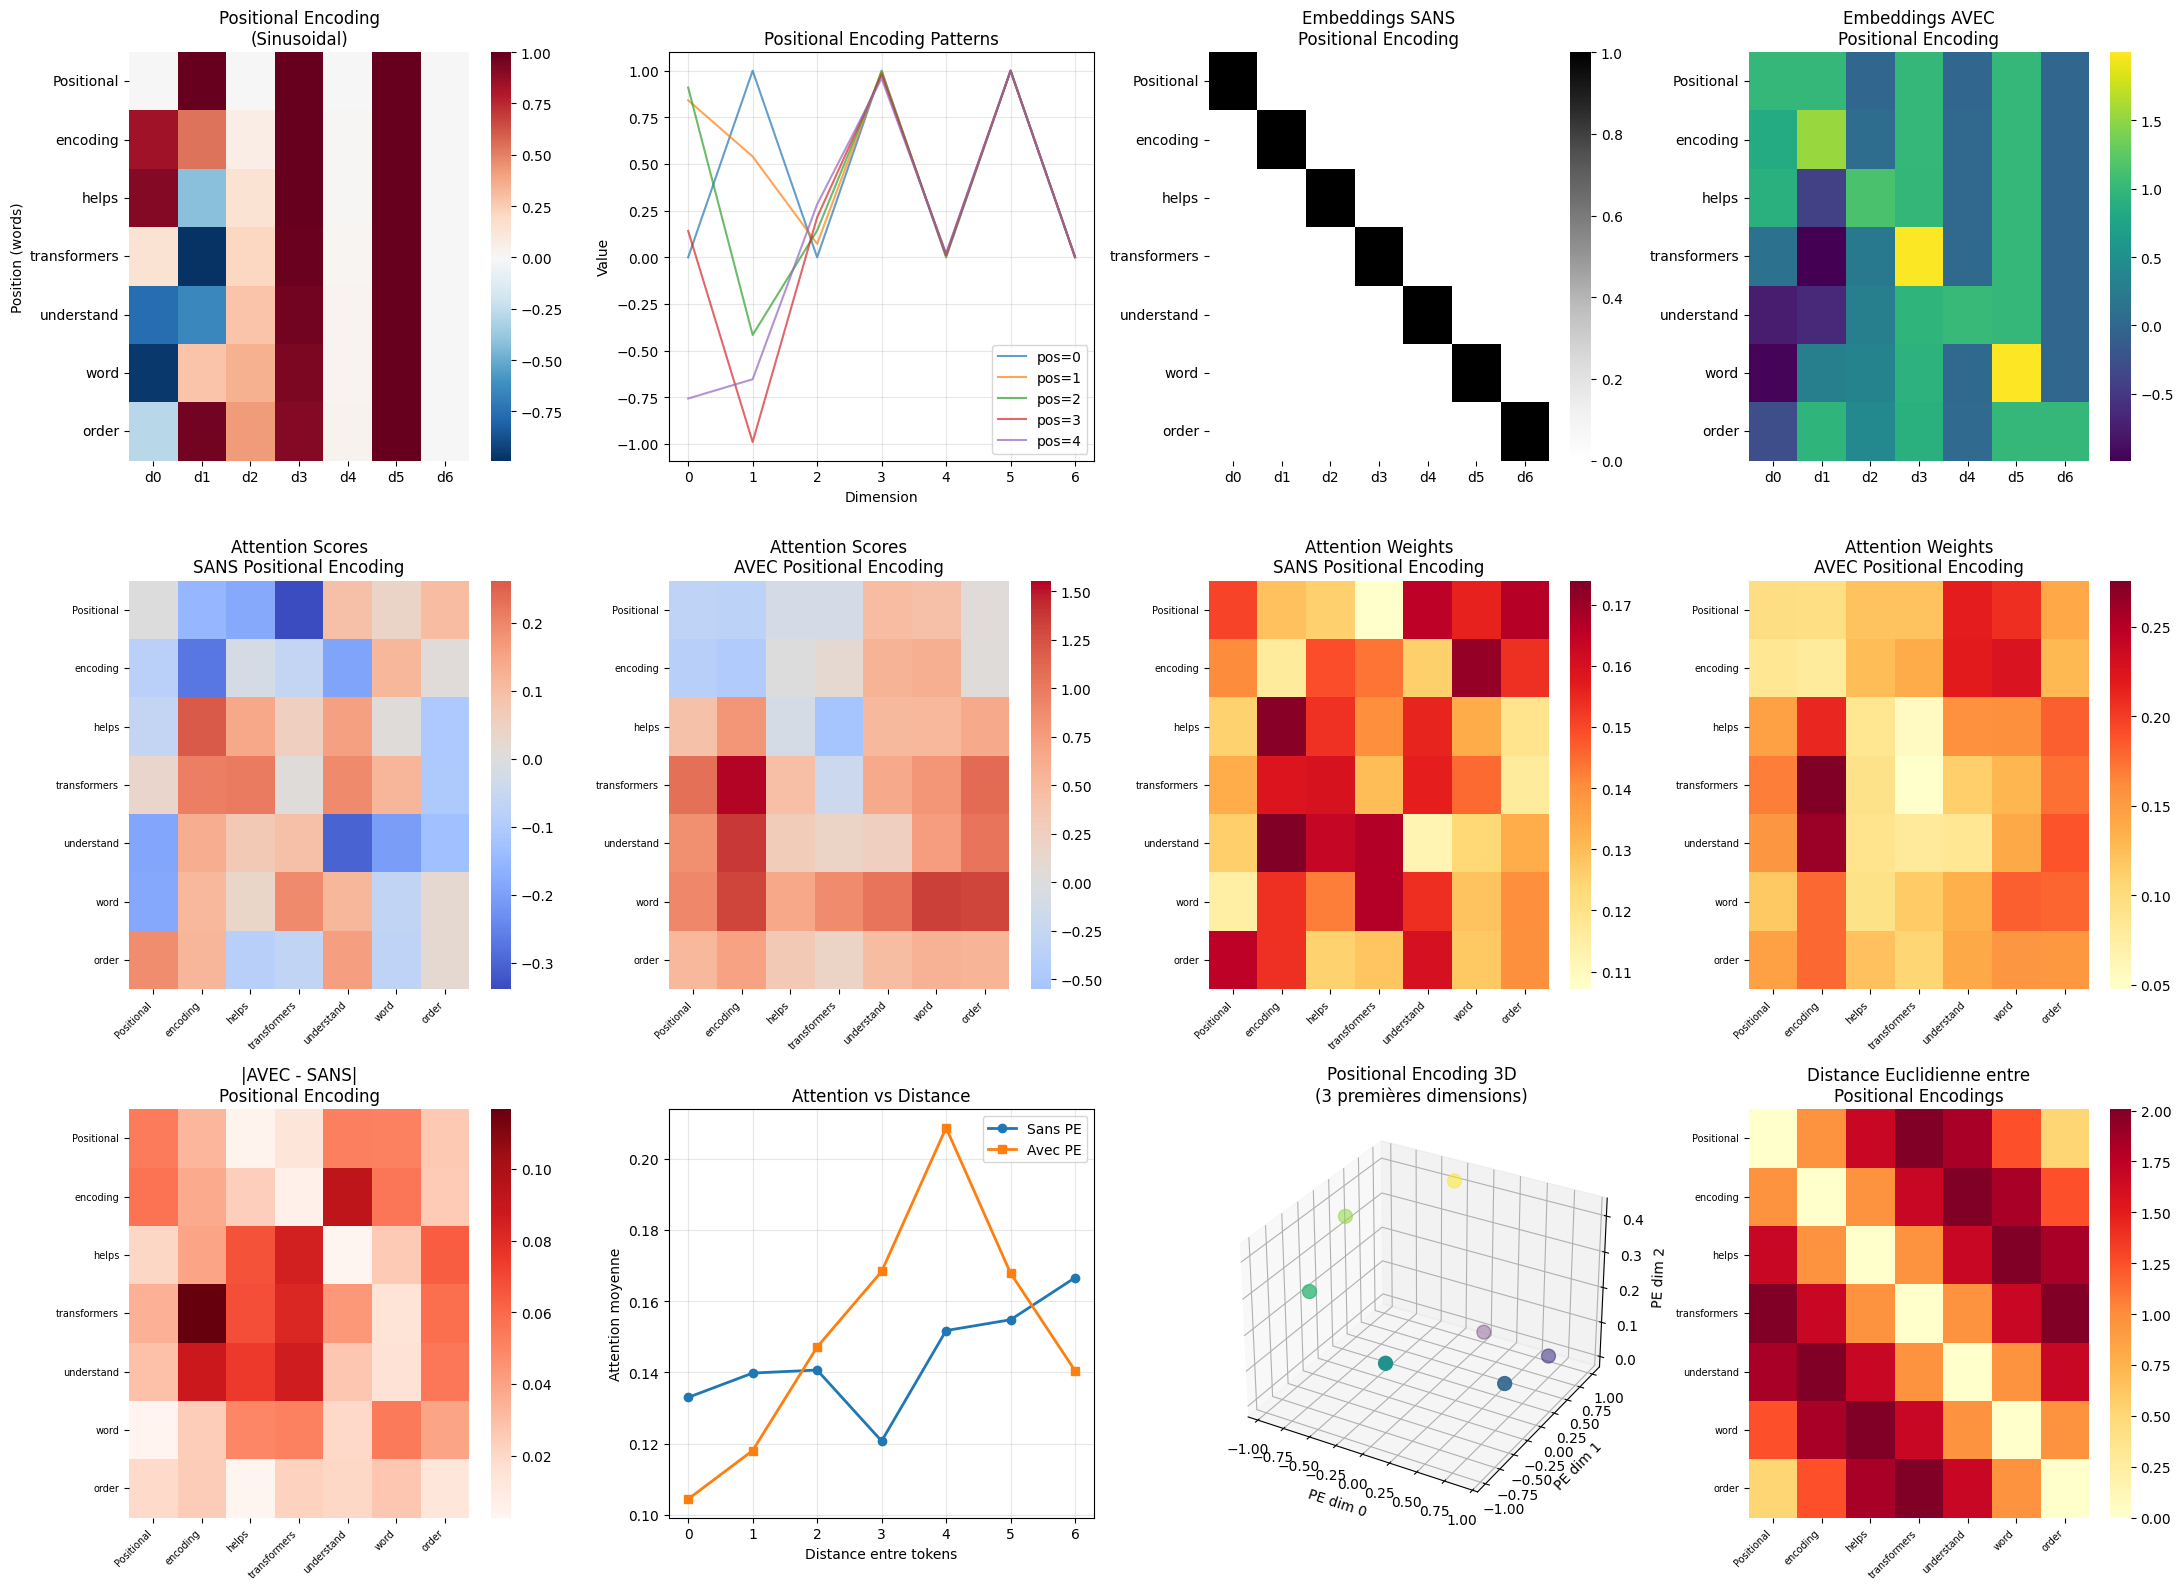

[[ 0.          1.          0.          1.          0.        ]
 [ 0.84147098  0.54030231  0.07190646  0.99741138  0.00517945]
 [ 0.90929743 -0.41614684  0.14344064  0.98965892  0.01035876]
 [ 0.14112001 -0.9899925   0.21423219  0.97678276  0.0155378 ]
 [-0.7568025  -0.65364362  0.28391461  0.95884957  0.02071642]]
[[0.15061499 0.12901485 0.12550386 0.10712924 0.16518743 0.1559559
  0.16659372]
 [0.14053056 0.11641541 0.14912222 0.14375875 0.12567994 0.17087446
  0.15361866]
 [0.12526337 0.17268124 0.15331715 0.14015108 0.15554028 0.13385128
  0.1191956 ]
 [0.13326519 0.15899635 0.15967087 0.12999426 0.15659402 0.14516243
  0.11631688]
 [0.12611294 0.17391481 0.16363406 0.16690211 0.11221462 0.12383249
  0.13338897]
 [0.11443424 0.1537813  0.14235899 0.16673999 0.15394017 0.12853365
  0.14021167]
 [0.16516815 0.1536929  0.12535666 0.12807474 0.16029072 0.12752868
  0.13988815]]
[[0.09712678 0.09587003 0.1211033  0.12092831 0.21708974 0.20739929
  0.14048255]
 [0.08417476 0.07934706 0.12

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def positional_encoding(seq_len, d_model):
    position = np.arange(seq_len)[:, np.newaxis]  
    
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))  
    
    pe = np.zeros((seq_len, d_model))
    
    pe_even_cols = pe[:, 0::2]
    pe_odd_cols = pe[:, 1::2]
    
    pe_even_cols[:] = np.sin(position * div_term[:pe_even_cols.shape[1]])
    pe_odd_cols[:] = np.cos(position * div_term[:pe_odd_cols.shape[1]])
    
    return pe

def simple_learned_positional_encoding(seq_len, d_model, seed=42):
    
    np.random.seed(seed)
    return np.random.randn(seq_len, d_model) * 0.1

sentence = "Positional encoding helps transformers understand word order".split()


print(f"\nPhrase: {' '.join(sentence)}")
print(f"Nombre de mots: {len(sentence)}")

vocab_size = len(sentence)
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)
inputs_original = np.array([embeddings[word_to_index[word]] for word in sentence])

print(f"\nSequence length: {vocab_size}")
print(f"Embedding dimension (d_model): {vocab_size}")
print(f"Input shape: {inputs_original.shape}")

pos_encoding = positional_encoding(vocab_size, vocab_size)

print(f"\npos Encoding shape: {pos_encoding.shape}")

print(f"  Mean: {np.mean(pos_encoding):.4f}")
print(f"  Std: {np.std(pos_encoding):.4f}")
print(f"  Min: {np.min(pos_encoding):.4f}")
print(f"  Max: {np.max(pos_encoding):.4f}")

inputs_with_pos = inputs_original + pos_encoding

np.random.seed(42)
def xavier_init(shape):
    limit = np.sqrt(6.0 / (shape[0] + shape[1]))
    return np.random.uniform(-limit, limit, size=shape)

Wq = xavier_init((vocab_size, vocab_size))
Wk = xavier_init((vocab_size, vocab_size))
Wv = xavier_init((vocab_size, vocab_size))

Q_no_pos = np.dot(inputs_original, Wq)
K_no_pos = np.dot(inputs_original, Wk)
V_no_pos = np.dot(inputs_original, Wv)

scores_no_pos = np.dot(Q_no_pos, K_no_pos.T) / np.sqrt(K_no_pos.shape[1])
attention_weights_no_pos = softmax(scores_no_pos)
output_no_pos = np.dot(attention_weights_no_pos, V_no_pos)

Q_with_pos = np.dot(inputs_with_pos, Wq)
K_with_pos = np.dot(inputs_with_pos, Wk)
V_with_pos = np.dot(inputs_with_pos, Wv)

scores_with_pos = np.dot(Q_with_pos, K_with_pos.T) / np.sqrt(K_with_pos.shape[1])
attention_weights_with_pos = softmax(scores_with_pos)
output_with_pos = np.dot(attention_weights_with_pos, V_with_pos)

fig = plt.figure(figsize=(22, 16))

plt.subplot(3, 4, 1)
sns.heatmap(pos_encoding, annot=False, cmap='RdBu_r', center=0,
            xticklabels=[f'd{i}' for i in range(min(vocab_size, 10))],
            yticklabels=sentence)
plt.title('Positional Encoding\n(Sinusoidal)')
plt.ylabel('Position (words)')

plt.subplot(3, 4, 2)
for i in range(min(5, vocab_size)):
    plt.plot(pos_encoding[i, :], label=f'pos={i}', alpha=0.7)
plt.title('Positional Encoding Patterns')
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 3)
sns.heatmap(inputs_original, annot=False, cmap='Greys',
            xticklabels=[f'd{i}' for i in range(min(vocab_size, 10))],
            yticklabels=sentence)
plt.title('Embeddings SANS\nPositional Encoding')

plt.subplot(3, 4, 4)
sns.heatmap(inputs_with_pos, annot=False, cmap='viridis',
            xticklabels=[f'd{i}' for i in range(min(vocab_size, 10))],
            yticklabels=sentence)
plt.title('Embeddings AVEC\nPositional Encoding')

plt.subplot(3, 4, 5)
sns.heatmap(scores_no_pos, annot=False, cmap='coolwarm', center=0,
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores\nSANS Positional Encoding')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(rotation=0, fontsize=7)

plt.subplot(3, 4, 6)
sns.heatmap(scores_with_pos, annot=False, cmap='coolwarm', center=0,
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores\nAVEC Positional Encoding')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(rotation=0, fontsize=7)

plt.subplot(3, 4, 7)
sns.heatmap(attention_weights_no_pos, annot=False, cmap='YlOrRd',
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights\nSANS Positional Encoding')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(rotation=0, fontsize=7)

plt.subplot(3, 4, 8)
sns.heatmap(attention_weights_with_pos, annot=False, cmap='YlOrRd',
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights\nAVEC Positional Encoding')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(rotation=0, fontsize=7)

plt.subplot(3, 4, 9)
diff_weights = np.abs(attention_weights_with_pos - attention_weights_no_pos)
sns.heatmap(diff_weights, annot=False, cmap='Reds',
            xticklabels=sentence, yticklabels=sentence)
plt.title('|AVEC - SANS|\nPositional Encoding')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(rotation=0, fontsize=7)

plt.subplot(3, 4, 10)

max_distance = vocab_size - 1
distances_no_pos = []
distances_with_pos = []

for d in range(max_distance + 1):
    weights_at_d_no_pos = []
    weights_at_d_with_pos = []
    for i in range(vocab_size):
        if i + d < vocab_size:
            weights_at_d_no_pos.append(attention_weights_no_pos[i, i+d])
            weights_at_d_with_pos.append(attention_weights_with_pos[i, i+d])
    distances_no_pos.append(np.mean(weights_at_d_no_pos))
    distances_with_pos.append(np.mean(weights_at_d_with_pos))

plt.plot(range(max_distance + 1), distances_no_pos, 'o-', label='Sans PE', linewidth=2)
plt.plot(range(max_distance + 1), distances_with_pos, 's-', label='Avec PE', linewidth=2)
plt.xlabel('Distance entre tokens')
plt.ylabel('Attention moyenne')
plt.title('Attention vs Distance')
plt.legend()
plt.grid(True, alpha=0.3)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(3, 4, 11, projection='3d')
positions = np.arange(vocab_size)
dim1 = pos_encoding[:, 0]
dim2 = pos_encoding[:, 1]
dim3 = pos_encoding[:, 2] if vocab_size > 2 else np.zeros(vocab_size)

ax.scatter(dim1, dim2, dim3, c=positions, cmap='viridis', s=100)
ax.set_xlabel('PE dim 0')
ax.set_ylabel('PE dim 1')
ax.set_zlabel('PE dim 2')
ax.set_title('Positional Encoding 3D\n(3 premières dimensions)')

plt.subplot(3, 4, 12)
distance_matrix = np.zeros((vocab_size, vocab_size))
for i in range(vocab_size):
    for j in range(vocab_size):
        distance_matrix[i, j] = np.linalg.norm(pos_encoding[i] - pos_encoding[j])

sns.heatmap(distance_matrix, annot=False, cmap='YlOrRd',
            xticklabels=sentence, yticklabels=sentence)
plt.title('Distance Euclidienne entre\nPositional Encodings')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(rotation=0, fontsize=7)

plt.tight_layout()
plt.show()


print(pos_encoding[:5, :5])

print(attention_weights_no_pos)

print(attention_weights_with_pos)



print("\nmoy d'attention par distance:")
print(f"{'Distance':<10} {'Sans PE':<15} {'Avec PE':<15} {'Différence'}")
print("-" * 55)
for d in range(min(6, max_distance + 1)):
    diff = distances_with_pos[d] - distances_no_pos[d]
    print(f"{d:<10} {distances_no_pos[d]:<15.4f} {distances_with_pos[d]:<15.4f} {diff:+.4f}")




Importance de positional encoding 
 Le self-attention est permutation-invariant.   Sans PE  Le modèle ne sait pas l'ORDRE des mots

Le positional encoding est important pour que les Transformers comprennent l'ordre des mots, compensant leur invariance par permutation.
